#회귀분석

## 병아리의 무게를 예측할 수 있을까? ( 회귀분석)

In [3]:
## 회귀분석이란?
### 회귀분석(Regression analysis)은 연속형 변수들에 대해 
#      두 변수 사이의 관계를 수식으로 나타내는 분석 방법. 

### 쉽게 말해서 x라는 독립변수와 y라는 종속변수가 존재할 때 이 두 변수 사이의 관계를
#       y = ax + b와 같은 형태의 수식으로 나타낼 수 있는 방법.

In [4]:
# 단순 선형 회귀분석

In [11]:
import pandas as pd

w= pd.read_csv('data/chick004.csv')
w.head()

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [12]:
w2 = w.iloc[:,1:5]
w2

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13
5,138,65,143,13
6,125,61,110,11
7,148,69,159,15
8,133,64,133,11
9,145,69,174,13


In [18]:
# 회귀분석 수행을 위한 모듈 불러오기 및 smf로 지칭하기
import statsmodels.formula.api as smf

gpt>
statsmodels.formula.api는 Python의 statsmodels 라이브러리의 모듈 중 하나로, 
통계 모델링에 사용되는 클래스와 함수들을 제공합니다. 

특히, 이 모듈은 R 스타일의 문자열 기반 모델 정의를 지원하며, 
데이터프레임을 사용하여 통계 모델을 쉽게 작성하고 추정할 수 있게 해줍니다.

여기서 smf는 statsmodels.formula 모듈을 축약한 이름으로,
statsmodels.formula.api를 사용할 때 자주 볼 수 있는 약어입니다.

statsmodels.formula.api 모듈의 핵심 기능은 다음과 같습니다:

모델 정의: 
    R 스타일의 문자열 기반 모델 정의를 지원합니다. 
    예를 들어, 선형 회귀 모델을 정의할 때는 다음과 같이 사용할 수 있습니다.

pythonCopy code
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x1 + x2', data=df)
여기서 'y ~ x1 + x2'는 종속 변수 y를 독립 변수 x1과 x2로 설명하는 선형 회귀 모델을 나타냅니다.

모델 피팅: 
    fit() 메서드를 사용하여 모델을 데이터에 피팅시킵니다.

pythonCopy code
results = model.fit()
이를 통해 모델의 계수와 통계적인 정보를 얻을 수 있습니다.

가설 검정 및 통계적 분석: 
    results 객체를 통해 가설 검정 및 다양한 통계적 분석을 수행할 수 있습니다.

pythonCopy code
print(results.summary())
이를 통해 회귀 모델의 통계적인 성능 및 계수에 대한 정보를 확인할 수 있습니다.

statsmodels.formula.api를 사용하면 
통계 모델링을 간편하게 수행할 수 있습니다.
R 스타일의 모델 정의를 통해 통계 모델을 명확하게 표현하고, 
데이터프레임과 함께 사용하여 통계적인 분석을 수행할 수 있습니다.

In [21]:
# 회귀분석 수행을 위한 모듈 불러오기 및 smf로 지칭하기
import statsmodels.formula.api as smf


# 종란무게 - 병아리무게 단순선형회귀모델 구축
model_lm = smf.ols(formula = 'weight ~ egg_weight', data = w2)


# 모델 학습
result_lm = model_lm.fit()


# 모델 결과 확인
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.32e-16
Time:                        12:00:39   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

gpt> 주어진 코드는 다중 선형 회귀 모델을 만들고 결과를 요약하는데 사용되는 코드입니다. 
여기서는 statsmodels 라이브러리를 사용하여 모델을 정의하고 피팅한 후, 
결과를 확인하는 방법에 대한 코드입니다.

모델 정의:

pythonCopy code
model_mlm2 = smf.ols(formula='weight ~ egg_weight + food', data=w2)
종속 변수(weight)와 독립 변수들(egg_weight, food)을 포함한 다중 선형 회귀 모델을 정의합니다.

smf.ols은 최소 제곱법(Ordinary Least Squares)을 사용하여 선형 회귀 모델을 만드는 함수입니다.

모델 피팅:
pythonCopy code
result_min2 = model_mlm2.fit()
fit() 메서드를 사용하여 데이터에 모델을 피팅합니다.
이를 통해 모델의 계수 등이 추정됩니다.

결과 확인:
python Copy code

result_min2.summary()
summary() 메서드는 회귀 분석 결과의 요약 통계를 출력합니다.

이를 통해 회귀 계수, 통계적 유의성, 설명력 등의 정보를 확인할 수 있습니다.
결과를 통해 나타나는 통계적 정보 중 일부는 다음과 같습니다:

R-squared (결정 계수): 모델이 종속 변수의 분산을 얼마나 잘 설명하는지를 나타내는 값.
1에 가까울수록 더 좋은 모델이라고 할 수 있습니다.

회귀 계수 (Intercept, egg_weight, food): 각 변수에 대한 회귀 계수와 표준 오차가 제공됩니다. 이 계수들은 독립 변수가 종속 변수에 미치는 영향을 나타냅니다.

P-value: 각 독립 변수에 대한 가설 검정 결과의 p-value를 나타냅니다. 
작은 p-value는 해당 변수가 통계적으로 유의미하다는 것을 나타냅니다.

이를 통해 모델이 데이터에 얼마나 적합한지, 각 독립 변수가 종속 변수에 어떤 영향을 미치는지 등의 정보를 파악할 수 있습니다.

In [23]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')                 # 한글처리위함
plt.rcParams['axes.unicode_minus'] = False    #축의 음수 기호 표시

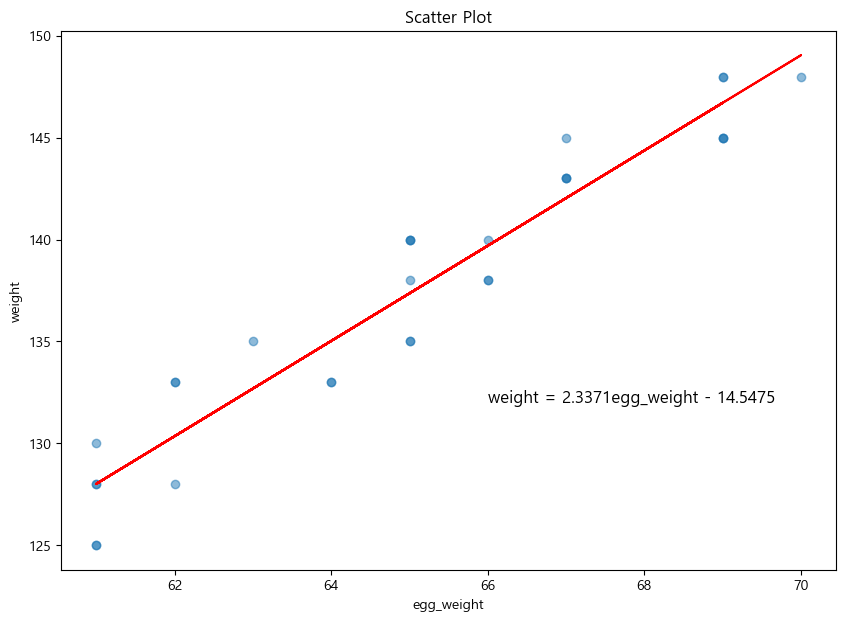

In [24]:
# 종란무게에 따른 병아리무게 산점도
plt.figure(figsize = (10,7))

plt.scatter(w.egg_weight, w.weight, alpha = .5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color = 'red')
plt.text(66, 132, 'weight = 2.3371egg_weight - 14.5475', fontsize = 12)

plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show()

 pairplot과 Scatter Plot 의 차이점을 알려줘
    
    pairplot과 scatter plot은 데이터를 시각화하는 데 사용되는 두 가지 다른 개념입니다.

Scatter Plot (산점도 그래프):

용도: 두 변수 간의 관계를 보여주기 위한 그래프로, 주로 연속형 변수들 간의 상관관계를 시각화하는 데 사용됩니다.

구성: 하나의 점이 하나의 데이터 포인트를 나타냅니다. X축과 Y축에 변수가 배치되어 각 데이터 포인트가 해당 변수의 값을 나타냅니다.

사용법: matplotlib나 seaborn과 같은 라이브러리에서 제공하는 함수를 사용하여 생성할 수 있습니다.

예시 코드:

pythonCopy code
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터 불러오기
tips = sns.load_dataset("tips")

# Scatter Plot 생성
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()
Pairplot (쌍끼리 비교하는 그래프):

용도: 데이터프레임의 모든 변수 쌍에 대해 산점도를 생성하여 한 눈에 여러 변수 간의 관계를 확인하는 데 사용됩니다.

구성: 대각선에는 각 변수의 분포를 보여주는 히스토그램이 있고, 그 외의 셀에는 해당 변수 쌍의 산점도가 그려집니다.

사용법: seaborn 라이브러리에서 제공하는 pairplot 함수를 사용하여 생성할 수 있습니다.

예시 코드:

python
Copy code
import seaborn as sns

-예시 데이터 불러오기
iris = sns.load_dataset("iris")

- Pairplot 생성
sns.pairplot(iris, hue="species")
plt.show()
따라서, Scatter Plot은 두 변수 간의 관계를 나타내는 단일 그래프이고, Pairplot은 데이터프레임의 모든 변수 쌍에 대한 여러 산점도를 포함하는 그래프입니다. Pairplot은 데이터의 다양한 변수 간의 관계를 한 눈에 살펴보기에 유용합니다.

## 다중회귀분석 (선형)

In [27]:
model_mlm2 = smf.ols(formula = 'weight~egg_weight + food', data = w2)
result_min2 = model_mlm2.fit()
result_min2.summary()
                     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.44e-18
Time:                        12:25:02   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""